***
***
# Introduction to the Basics of Statistics
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# 一、使用Pandas清洗泰坦尼克数据
- 练习使用Pandas

# 二、分析天涯回帖数据
- 学习使用Statsmodels



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

![](./img/matplotlib.svg)

In [2]:
import pandas as pd

![](./img/pandas_logo.png)

# Statsmodels

http://statsmodels.sourceforge.net/

![](./img/statsmodels_hybi_banner.png)

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. 

Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python. 

# 使用pandas清洗泰坦尼克数据

# 从本机读取数据

In [2]:
import pandas as pd

train = pd.read_csv('../data/tatanic_train.csv',\
                    sep = ",", header=0)
test = pd.read_csv('../data/tatanic_test.csv',\
                    sep = ",", header=0)

You can easily explore a DataFrame  
 - .describe() summarizes the columns/features of the DataFrame, including the count of observations, mean, max and so on. 
 - Another useful trick is to look at the dimensions of the DataFrame. This is done by requesting the .shape attribute of your DataFrame object. (ex. your_data.shape)

In [5]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.shape#, len(train)
#train.columns

(891, 13)

In [11]:
# Passengers that survived vs passengers that passed away
train["Survived"][:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [10]:
# Passengers that survived vs passengers that passed away
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# As proportions
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train[train['Sex']=='female'][:3]#[train['Pclass'] == 3]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [13]:
# Males that survived vs males that passed away
train[["Survived", 'Fare']][train["Sex"] == 'male'][:3]

,Survived,Fare
0,0,7.2500
4,0,8.0500
5,0,8.4583


In [15]:
# Males that survived vs males that passed away
train["Survived"][train["Sex"] == 'male'].value_counts() 

0    468
1    109
Name: Survived, dtype: int64

In [31]:
# Females that survived vs Females that passed away
train["Survived"][train["Sex"] == 'female'].value_counts() 

1    233
0     81
Name: Survived, dtype: int64

In [32]:
# Normalized male survival
train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True) 

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [33]:
# Normalized female survival
train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [97]:
# Create the column Child, and indicate whether child or not a child. Print the new column.
train["Child"] = float('NaN')
train.Child[train.Age < 5] = 1
train.Child[train.Age >= 5] = 0
print(train.Child[:3])

0    0.0
1    0.0
2    0.0
Name: Child, dtype: float64


/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# Normalized Survival Rates for under 18
train.Survived[train.Child == 1].value_counts(normalize = True)

1    0.675
0    0.325
Name: Survived, dtype: float64

In [24]:
# Normalized Survival Rates for over 18
train.Survived[train.Child == 0].value_counts(normalize = True)

0    0.618968
1    0.381032
Name: Survived, dtype: float64

In [4]:
age = pd.cut(train['Age'], [0, 18, 80])
train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [5]:
fare = pd.qcut(train['Fare'], 2)
train.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [21]:
# Create a copy of test: test_one
test_one = test
# Initialize a Survived column to 0
test_one['Survived'] = 0
# Set Survived to 1 if Sex equals "female" and print the `Survived` column from `test_one`
test_one.Survived[test_one.Sex =='female'] = 1

print(test_one.Survived[:3])

0    0
1    1
2    0
Name: Survived, dtype: int64


/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna('S')

#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/chengjun/anaconda/lib/python2.7/site-packages/ip

# 分析天涯回帖数据

In [98]:
df = pd.read_csv('../data/tianya_bbs_threads_list.txt',\
                 sep = "\t", names = ['title','link', \
                        'author','author_page',\
                        'click','reply','time'])
df[:2]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [15]:
# df=df.rename(columns = {0:'title', 1:'link', \
#                         2:'author',3:'author_page',\
#                         4:'click', 5:'reply', 6:'time'})
# df[:5]

In [99]:
da = pd.read_csv('../data/tianya_bbs_threads_author_info.txt', 
                 sep = "\t", names = ['author_page','followed_num',\
                        'fans_num','post_num', \
                        'comment_num'])
da[:2]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/50499450,152,27452,1020,1341
1,http://www.tianya.cn/74341835,0,1,2,5


In [19]:
# da=da.rename(columns = {0:'author_page', 1:'followed_num',\
#                         2:'fans_num',3:'post_num', \
#                         4:'comment_num'})
# # da[:5]

In [101]:
data = pd.concat([df,da], axis=1)
len(data)

467

In [102]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59,http://www.tianya.cn/50499450,152,27452,1020,1341
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41,http://www.tianya.cn/74341835,0,1,2,5
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11,http://www.tianya.cn/36535656,19,28,816,1268


# Time

In [103]:
type(data.time[0])

str

In [104]:
# extract date from datetime
# date = map(lambda x: x[:10], data.time)
date = [i[:10] for i in data.time]
#date = [i[:10] for i in data.time]
data['date'] = pd.to_datetime(date)

In [107]:
data.date[:3]

0   2012-10-29
1   2012-10-24
2   2012-10-28
Name: date, dtype: datetime64[ns]

In [108]:
# convert str to datetime format
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day
type(data.time[0])

pandas.tslib.Timestamp

In [109]:
data.describe()
#data.head()

,click,reply,month,year,day
count,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1534.957173,18.907923,7.432548,2012.620985,17.961456
std,11099.249834,144.869921,3.084860,1.795269,9.491730
min,11.000000,0.000000,1.000000,2006.000000,1.000000
25%,42.500000,0.000000,5.000000,2013.000000,8.000000
50%,84.000000,0.000000,6.000000,2013.000000,23.000000
75%,322.000000,4.000000,11.000000,2013.000000,25.000000
max,194675.000000,2703.000000,12.000000,2015.000000,31.000000


# Statsmodels

http://statsmodels.sourceforge.net/

![](./img/statsmodels_hybi_banner.png)

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. 

Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python. 

# Features include:

- Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results
- Many more models and extensions in development

In [35]:
import statsmodels.api as sm

# Describe

In [38]:
data.describe()

,click,reply,month,year,day
count,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1534.957173,18.907923,7.432548,2012.620985,17.961456
std,11099.249834,144.869921,3.084860,1.795269,9.491730
min,11.000000,0.000000,1.000000,2006.000000,1.000000
25%,42.500000,0.000000,5.000000,2013.000000,8.000000
50%,84.000000,0.000000,6.000000,2013.000000,23.000000
75%,322.000000,4.000000,11.000000,2013.000000,25.000000
max,194675.000000,2703.000000,12.000000,2015.000000,31.000000


In [39]:
import numpy as np

np.mean(data.click), np.std(data.click), np.sum(data.click)

(1534.9571734475376, 11087.35990002894, 716825)

In [40]:
# 不加权的变量描述
d1 = sm.stats.DescrStatsW(data.click, \
                          weights=[1 for i in data.click])
d1.mean, d1.var, d1.std, d1.sum

(1534.9571734475376, 122929549.55276974, 11087.35990002894, 716825.0)

In [41]:
# 加权的变量描述
d1 = sm.stats.DescrStatsW(data.click, weights=data.reply)
d1.mean, d1.var, d1.std, d1.sum

(83335.963986409959, 6297145701.6868114, 79354.556905617035, 735856562.0)

In [163]:
np.median(data.click) # np.percentile 

84.0

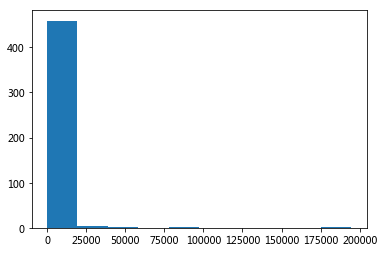

In [42]:
plt.hist(data.click)
plt.show()

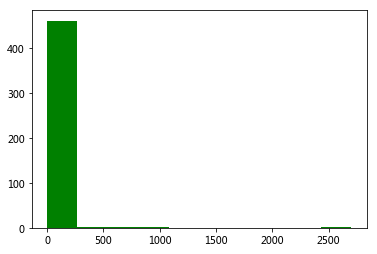

In [43]:
plt.hist(data.reply, color = 'green')
plt.show()

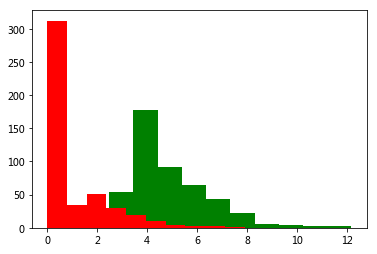

In [112]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

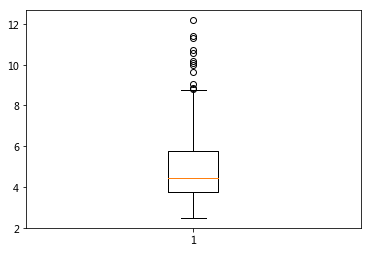

In [115]:
# Plot the height and weight to see
plt.boxplot([np.log(data.click+1)])
plt.show()

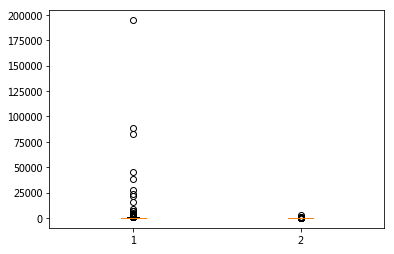

In [47]:
# Plot the height and weight to see
plt.boxplot([data.click, data.reply])
plt.show()

In [116]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [117]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )
data.describe()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1534.957173,18.907923,15.713062,839.421842,146.336188,434.556745,7.432548,2012.620985,17.961456
std,11099.249834,144.869921,120.221465,7589.853870,577.441999,1989.458332,3.084860,1.795269,9.491730
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000
25%,42.500000,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,2013.000000,8.000000
50%,84.000000,0.000000,0.000000,1.000000,16.000000,9.000000,6.000000,2013.000000,23.000000
75%,322.000000,4.000000,1.000000,4.000000,84.000000,88.000000,11.000000,2013.000000,25.000000
max,194675.000000,2703.000000,1817.000000,108449.000000,10684.000000,24848.000000,12.000000,2015.000000,31.000000


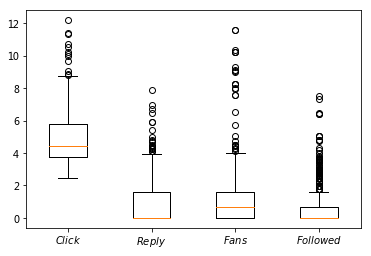

In [50]:
import numpy as np
# Plot the height and weight to see
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1),\
             np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$',\
                      '$Followed$'])
plt.show()

# Pandas自身已经包含了boxplot的功能

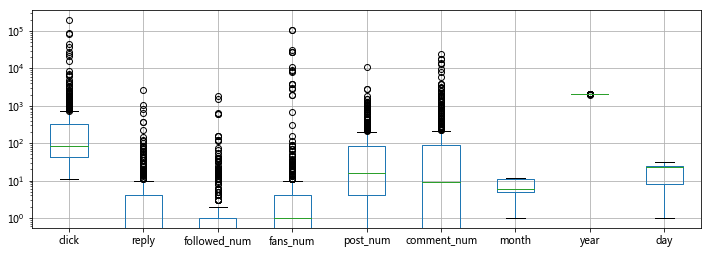

In [118]:
fig = plt.figure(figsize=(12,4))
data.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

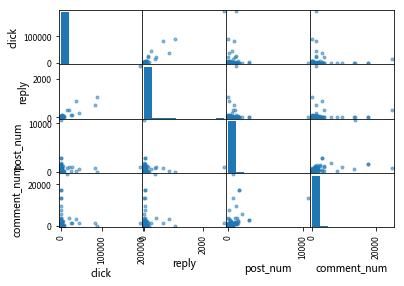

In [52]:
from pandas.tools import plotting

# fig = plt.figure(figsize=(10, 10))
plotting.scatter_matrix(data[['click', 'reply',\
                              'post_num','comment_num']]) 
plt.show()

### 更多使用pandas.plotting绘图的操作见：
http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

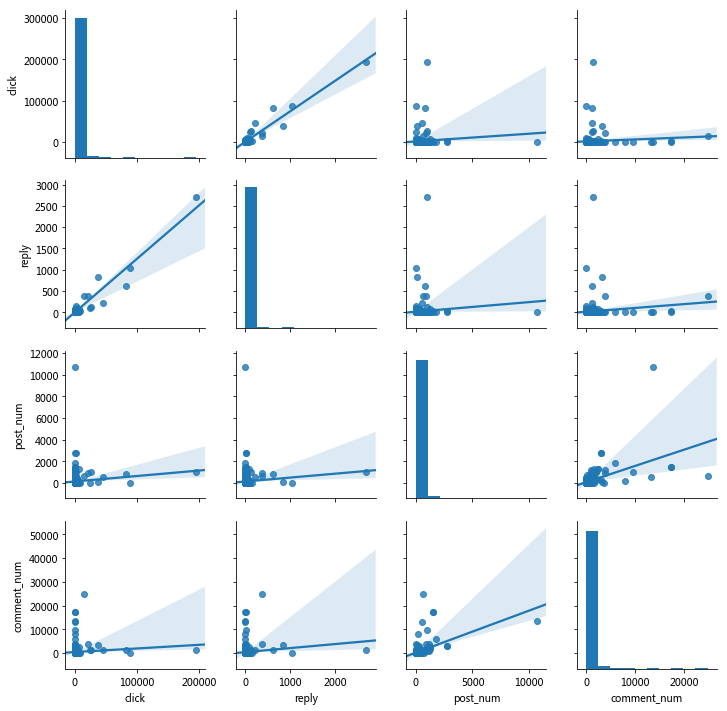

In [53]:
import seaborn # conda install seaborn
seaborn.pairplot(data, vars=['click', 'reply', \
                             'post_num', 'comment_num'],
                  kind='reg')  

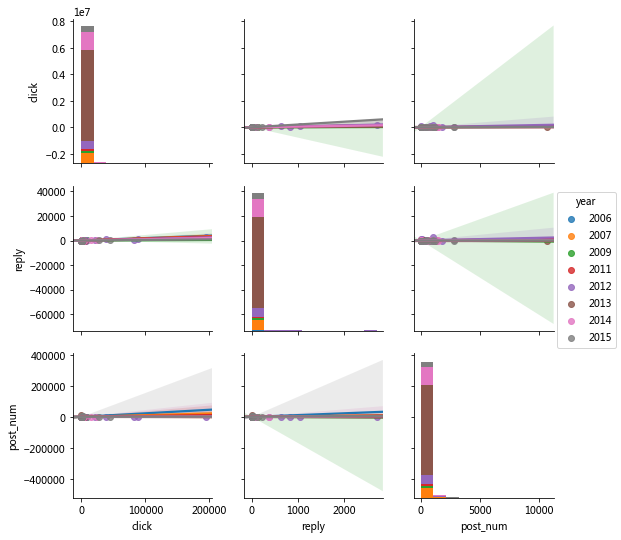

In [54]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

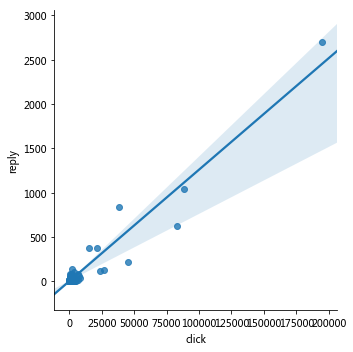

In [126]:
seaborn.lmplot(y='reply', x='click', data=data, #logx = True,
               size = 5) 
plt.show()

# values_counts

In [56]:
data.year.value_counts()

2013    304
2014     63
2007     34
2012     33
2015     20
2011      6
2009      6
2006      1
Name: year, dtype: int64

In [127]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,year
2006,1
2007,34
2009,6
2011,6
2012,33
2013,304
2014,63
2015,20


In [128]:
dd.index

Int64Index([2006, 2007, 2009, 2011, 2012, 2013, 2014, 2015], dtype='int64')

In [129]:
dd_date_str = list(map(lambda x: str(x) +'-01-01', dd.index))
dd_date_str

['2006-01-01',
 '2007-01-01',
 '2009-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01']

In [130]:
dd_date = pd.to_datetime(list(dd_date_str))
dd_date

DatetimeIndex(['2006-01-01', '2007-01-01', '2009-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01'],
              dtype='datetime64[ns]', freq=None)

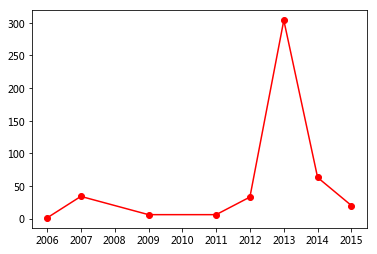

In [131]:
plt.plot(dd_date, dd.year, 'r-o')
plt.show()

In [132]:
ds = dd.cumsum()
ds

,year
2006,1
2007,35
2009,41
2011,47
2012,80
2013,384
2014,447
2015,467


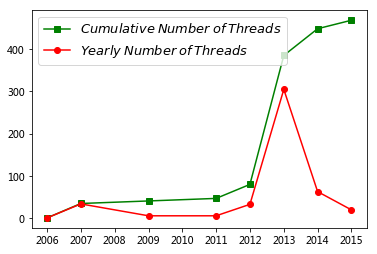

In [133]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = list(map(lambda x: str(x) +'-01-01', dat.index))
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

# groupby

In [137]:
dg = data.groupby('year').sum()
dg

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2006,1214,24,0,2,278,291,8,24
2007,28290,514,22,137,8041,10344,281,512
2009,18644,186,17,12,531,571,39,78
2011,2889,28,84,28,332,661,50,72
2012,463720,5933,2779,59511,12315,32498,322,819
2013,63140,937,571,43265,24359,40362,2458,6111
2014,57764,772,2216,16664,11266,98025,233,579
2015,81164,436,1649,272391,11217,20186,80,193


In [138]:
dgs = dg.cumsum()
dgs

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2006,1214,24,0,2,278,291,8,24
2007,29504,538,22,139,8319,10635,289,536
2009,48148,724,39,151,8850,11206,328,614
2011,51037,752,123,179,9182,11867,378,686
2012,514757,6685,2902,59690,21497,44365,700,1505
2013,577897,7622,3473,102955,45856,84727,3158,7616
2014,635661,8394,5689,119619,57122,182752,3391,8195
2015,716825,8830,7338,392010,68339,202938,3471,8388


In [139]:
def getDate(dat):
    dat_date_str = list(map(lambda x: str(x) +'-01-01', dat.index))
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

dg.date = getDate(dg)

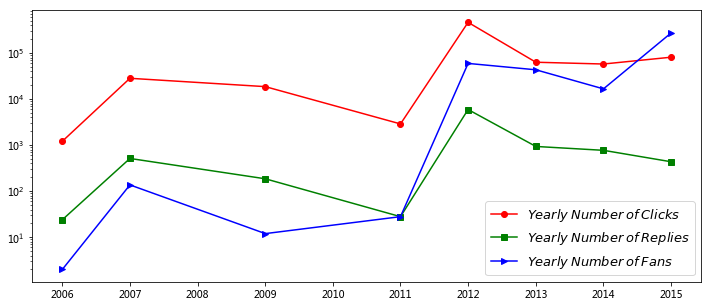

In [140]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.plot(dg.date, dg.fans_num, 'b->', label = '$Yearly\:Number\:of\:Fans$')

plt.yscale('log')

plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

In [141]:
data.groupby('year')['click'].sum()

year
2006      1214
2007     28290
2009     18644
2011      2889
2012    463720
2013     63140
2014     57764
2015     81164
Name: click, dtype: int64

In [142]:
data.groupby('year')['click'].mean()

year
2006     1214.000000
2007      832.058824
2009     3107.333333
2011      481.500000
2012    14052.121212
2013      207.697368
2014      916.888889
2015     4058.200000
Name: click, dtype: float64

# 常用的统计分析方法
- t检验
- 卡方检验
- 相关
- 回归

# T-test

http://statsmodels.sourceforge.net/devel/stats.html

# RQ: 转载的文章的点击量是否显著地小于原创的文章？

In [143]:
repost = []
for i in df.title:
    if u'转载' in i:
        repost.append(1)
    else:
        repost.append(0)

In [145]:
df['repost'] = repost

In [146]:
df.groupby('repost').median()

,click,reply
repost,,
0,263.0,1.5
1,56.0,0.0


In [147]:
df['click'][df['repost']==0][:5]

0    194675
2     82779
3     45304
5     27026
6     24026
Name: click, dtype: int64

In [148]:
df['click'][df['repost']==1][:5]

1     88244
4     38132
13     4990
16     3720
18     3421
Name: click, dtype: int64

In [152]:
from scipy import stats
stats.ttest_ind(np.log(df.click+1), df.repost)

Ttest_indResult(statistic=56.577005918931135, pvalue=1.1032740874872203e-303)

In [154]:
sm.stats.ttest_ind(np.log(df.click+1), df.repost)
# test statistic, pvalue and degrees of freedom

(56.577005918931143, 1.1032740874869695e-303, 932.0)

# A chi-squared test

https://en.wikipedia.org/wiki/Chi-squared_test

- also referred to as χ² test (or chi-square test), is any statistical hypothesis test in which the sampling distribution of the test statistic is a chi-square distribution when the null hypothesis is true. 
- A chi-squared test can then be used to `reject the null hypothesis that the data are independent`.
- Test statistics that follow a chi-squared distribution arise from an `assumption of independent normally distributed data`, which is valid in many cases due to `the central limit theorem`. 
- Chi-squared tests are often constructed from a `sum of squared errors`, or through the `sample variance`.




- Suppose there is a city of 1 million residents with `four neighborhoods`: A, B, C, and D. 

- A random sample of 650 residents of the city is taken and their occupation is recorded as "blue collar", "white collar", or "no collar". 

- `The null hypothesis` is that each person's neighborhood of residence is independent of the person's occupational classification. The data are tabulated as:


|               |  A           |    B          |C              | D  | Total|
| -------------|:-------------:|:-------------:|:-------------:|-----:|-----:|
| White collar| 90 | 60 | 104 |95 | 349|
| Blue collar| 30 | 50 | 51 | 20| 151|
| No coloar| 30 | 40 | 45 | 35|150|
| Total | 150 | 150| 200| 150| 650|

- Let us take the sample living in neighborhood A, 150/650, to estimate what proportion of the whole 1 million people live in neighborhood A. 
- Similarly we take 349/650 to estimate what proportion of the 1 million people are white-collar workers. 
- By the assumption of independence under the hypothesis we should "expect" the number of `white-collar workers in neighborhood A` to be

$
\frac{150}{650} \frac{349}{650} 650 = 80.54
$

Then in that "cell" of the table, we have

$\frac{(\text{observed}-\text{expected})^2}{\text{expected}} = \frac{(90-80.54)^2}{80.54}$.

The sum of these quantities over all of the cells is the `test statistic`. 

Under the null hypothesis, it has approximately a chi-square distribution whose number of `degrees of freedom` are

$ (\text{number of rows}-1)(\text{number of columns}-1) = (3-1)(4-1) = 6. $

If the test statistic is improbably large according to that chi-square distribution, then one rejects the null hypothesis of independence.

![](./img/600px-Chi-square_distributionCDF-English.png)

# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)[source]
- Calculates a one-way chi square test.
- The chi square test tests the null hypothesis that the categorical data has the given frequencies.

Parameters:	
- f_obs : array_like Observed frequencies in each category.
- f_exp : array_like, optional Expected frequencies in each category. By default the categories are assumed to be equally likely.
- ddof : int, optional

In [428]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], \
          f_exp=[16, 16, 16, 16, 16, 8])


Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

![](./img/scipy_org_logo.gif)

In [155]:
from scipy.stats import chi2
# p_value = chi2.sf(chi_statistic, df)
print(chi2.sf(3.5, 5))
print(1 - chi2.cdf(3.5,5))

0.62338762775
0.62338762775


# Correlation

In [157]:
# np.corrcoef(data.click, data.reply)

np.corrcoef(np.log(data.click+1), \
                  np.log(data.reply+1))

array([[ 1.        ,  0.77721397],
       [ 0.77721397,  1.        ]])

In [383]:
data.corr()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
click,1.000000,0.963966,0.143595,0.158116,0.097502,0.085615,0.038788,-0.024827,0.048361
reply,0.963966,1.000000,0.199270,0.159387,0.090342,0.123341,0.040165,-0.041208,0.058738
followed_num,0.143595,0.199270,1.000000,0.407656,0.211677,0.499612,-0.036037,0.051187,-0.020604
fans_num,0.158116,0.159387,0.407656,1.000000,0.341724,0.145387,-0.084243,0.102301,-0.045883
post_num,0.097502,0.090342,0.211677,0.341724,1.000000,0.514695,-0.070024,-0.011786,-0.033254
comment_num,0.085615,0.123341,0.499612,0.145387,0.514695,1.000000,-0.118703,0.069160,-0.119840
month,0.038788,0.040165,-0.036037,-0.084243,-0.070024,-0.118703,1.000000,-0.236920,0.535354
year,-0.024827,-0.041208,0.051187,0.102301,-0.011786,0.069160,-0.236920,1.000000,-0.046699
day,0.048361,0.058738,-0.020604,-0.045883,-0.033254,-0.119840,0.535354,-0.046699,1.000000


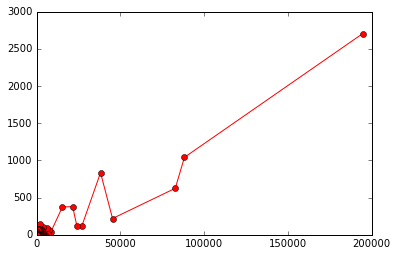

In [13]:

plt.plot(df.click, df.reply, 'r-o')
plt.show()

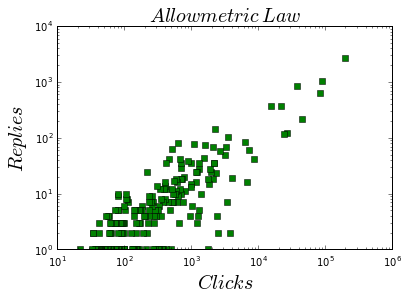

In [16]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

# Regression

In [66]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', \
                  data=dat).fit()

有些使用windows的同学无法运行上述代码：

## 在spyder中打开terminal
# 输入: pip install -U patsy

https://groups.google.com/forum/#!topic/pystatsmodels/KcSzNqDxv-Q


In [21]:
# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.90e-08
Time:                        23:39:42   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [68]:
reg = smf.ols('reply ~ click + followed_num', \
              data=data).fit()

In [138]:
reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3231.
Date:                Sun, 17 Apr 2016   Prob (F-statistic):          4.30e-273
Time:                        02:04:27   Log-Likelihood:                -2354.7
No. Observations:                 467   AIC:                             4715.
Df Residuals:                     464   BIC:                             4728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.4024      1.766     -0.794   

In [60]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) \
+np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 14 May 2017   Prob (F-statistic):           4.03e-93
Time:                        11:06:31   Log-Likelihood:                -596.73
No. Observations:                 467   AIC:                             1201.
Df Residuals:                     463   BIC:                             1218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

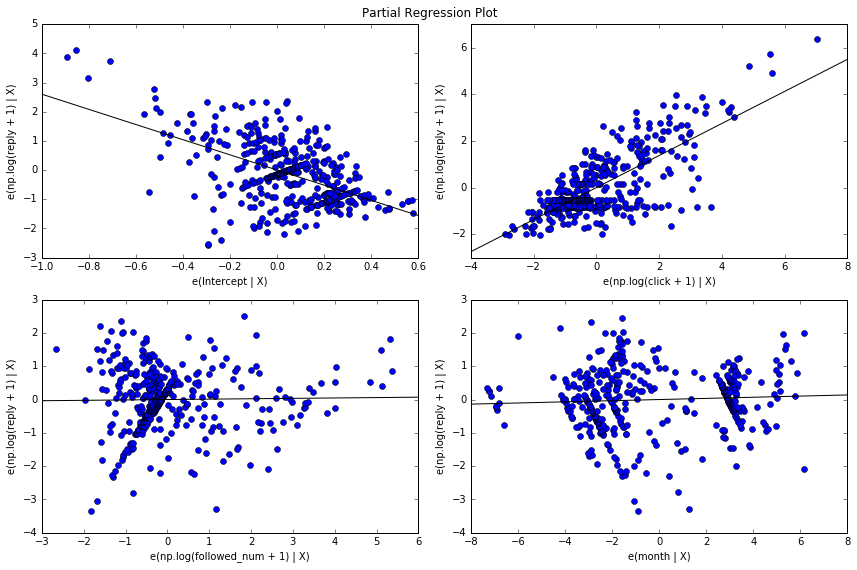

In [209]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()


In [429]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"}) # make name pythonic

In [434]:
data[:5]

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


# 参考文献
- scipy-lectures 
    - http://www.scipy-lectures.org/index.html
    - http://www.scipy-lectures.org/packages/statistics/index.html